Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.


Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

Los objetivos de hoy son:


1. Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.
2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
    - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Del dataset que hemos elegido:
The data set includes reviews on destinations in 10 categories mentioned across East Asia. Each traveler rating is mapped as
 - Excellent(4)

 - Very Good(3)

 - Average(2) 

 - Poor(1)
 
 - Terrible(0) 


In [2]:
df = pd.read_csv("data/adult.data.csv", index_col = 0 )
df.head(2)

,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
39,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
nuevo_nombre = {col: col.strip().replace(" ", "").lower() for col in df.columns}

In [4]:
df.rename(columns = nuevo_nombre, inplace = True)

In [5]:
renombre = {'white': 'ethnicity',
            '2174' : 'capital_gain',
            'male' : 'gender',
            '0' : 'capital_lost',
            '13' : 'education_num',
            '40' : 'hours_week',
            '77516' : 'final_weight',
            'not-in-family' : 'relationship',
            'never-married' : 'marital_status',
            'adm-clerical' : 'ocupation',
        
            }

In [6]:
df.rename(columns = renombre, inplace = True)

In [7]:
#duplicados

In [8]:
df.head()

,state-gov,final_weight,bachelors,education_num,marital_status,ocupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,united-states,<=50k
39,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
df["capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [10]:
df.shape

(32560, 14)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_weight,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital_lost,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [12]:
df.describe(include='object')

,state-gov,bachelors,marital_status,ocupation,relationship,ethnicity,gender,united-states,<=50k
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 50 to 52
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state-gov       32560 non-null  object
 1   final_weight    32560 non-null  int64 
 2   bachelors       32560 non-null  object
 3   education_num   32560 non-null  int64 
 4   marital_status  32560 non-null  object
 5   ocupation       32560 non-null  object
 6   relationship    32560 non-null  object
 7   ethnicity       32560 non-null  object
 8   gender          32560 non-null  object
 9   capital_gain    32560 non-null  int64 
 10  capital_lost    32560 non-null  int64 
 11  hours_week      32560 non-null  int64 
 12  united-states   32560 non-null  object
 13  <=50k           32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [14]:
df.isnull().sum()

state-gov         0
final_weight      0
bachelors         0
education_num     0
marital_status    0
ocupation         0
relationship      0
ethnicity         0
gender            0
capital_gain      0
capital_lost      0
hours_week        0
united-states     0
<=50k             0
dtype: int64

In [15]:
numericas = df.select_dtypes(include=['int64', 'float64'])
lista_columnas = list(numericas)

In [16]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {}
    
   
    for col in lista_columnas:
        
        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        
       
        IQR = Q3 - Q1
        
       
        outlier_step = 1.5 * IQR
        
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index)) 
        

    
    return dicc_indices 

In [17]:
#indices de los outliers
indices = detectar_outliers(lista_columnas, df)

In [18]:
# Columnas con outliers 
indices.keys()

dict_keys(['final_weight', 'education_num', 'capital_gain', 'capital_lost', 'hours_week'])

In [19]:
indices

{'final_weight': [19,
  31,
  18,
  24,
  71,
  27,
  34,
  30,
  41,
  37,
  35,
  43,
  57,
  19,
  29,
  39,
  20,
  41,
  31,
  30,
  47,
  45,
  45,
  24,
  23,
  19,
  59,
  39,
  25,
  23,
  35,
  36,
  50,
  76,
  40,
  28,
  36,
  28,
  34,
  50,
  63,
  29,
  32,
  34,
  20,
  54,
  28,
  46,
  20,
  42,
  69,
  37,
  35,
  45,
  41,
  44,
  32,
  32,
  28,
  19,
  21,
  27,
  42,
  44,
  29,
  31,
  39,
  29,
  39,
  23,
  32,
  25,
  41,
  30,
  23,
  22,
  23,
  18,
  47,
  37,
  34,
  30,
  29,
  27,
  19,
  18,
  34,
  56,
  41,
  32,
  20,
  32,
  22,
  39,
  37,
  25,
  47,
  34,
  24,
  31,
  61,
  28,
  38,
  33,
  28,
  30,
  19,
  31,
  29,
  47,
  35,
  43,
  54,
  35,
  46,
  40,
  23,
  58,
  52,
  22,
  21,
  27,
  22,
  32,
  30,
  19,
  51,
  37,
  24,
  18,
  23,
  53,
  43,
  39,
  64,
  40,
  23,
  19,
  52,
  25,
  29,
  21,
  34,
  27,
  59,
  30,
  21,
  45,
  30,
  35,
  21,
  43,
  53,
  67,
  21,
  27,
  69,
  44,
  34,
  41,
  37,
  34,
  22,
  52,


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_weight,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital_lost,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


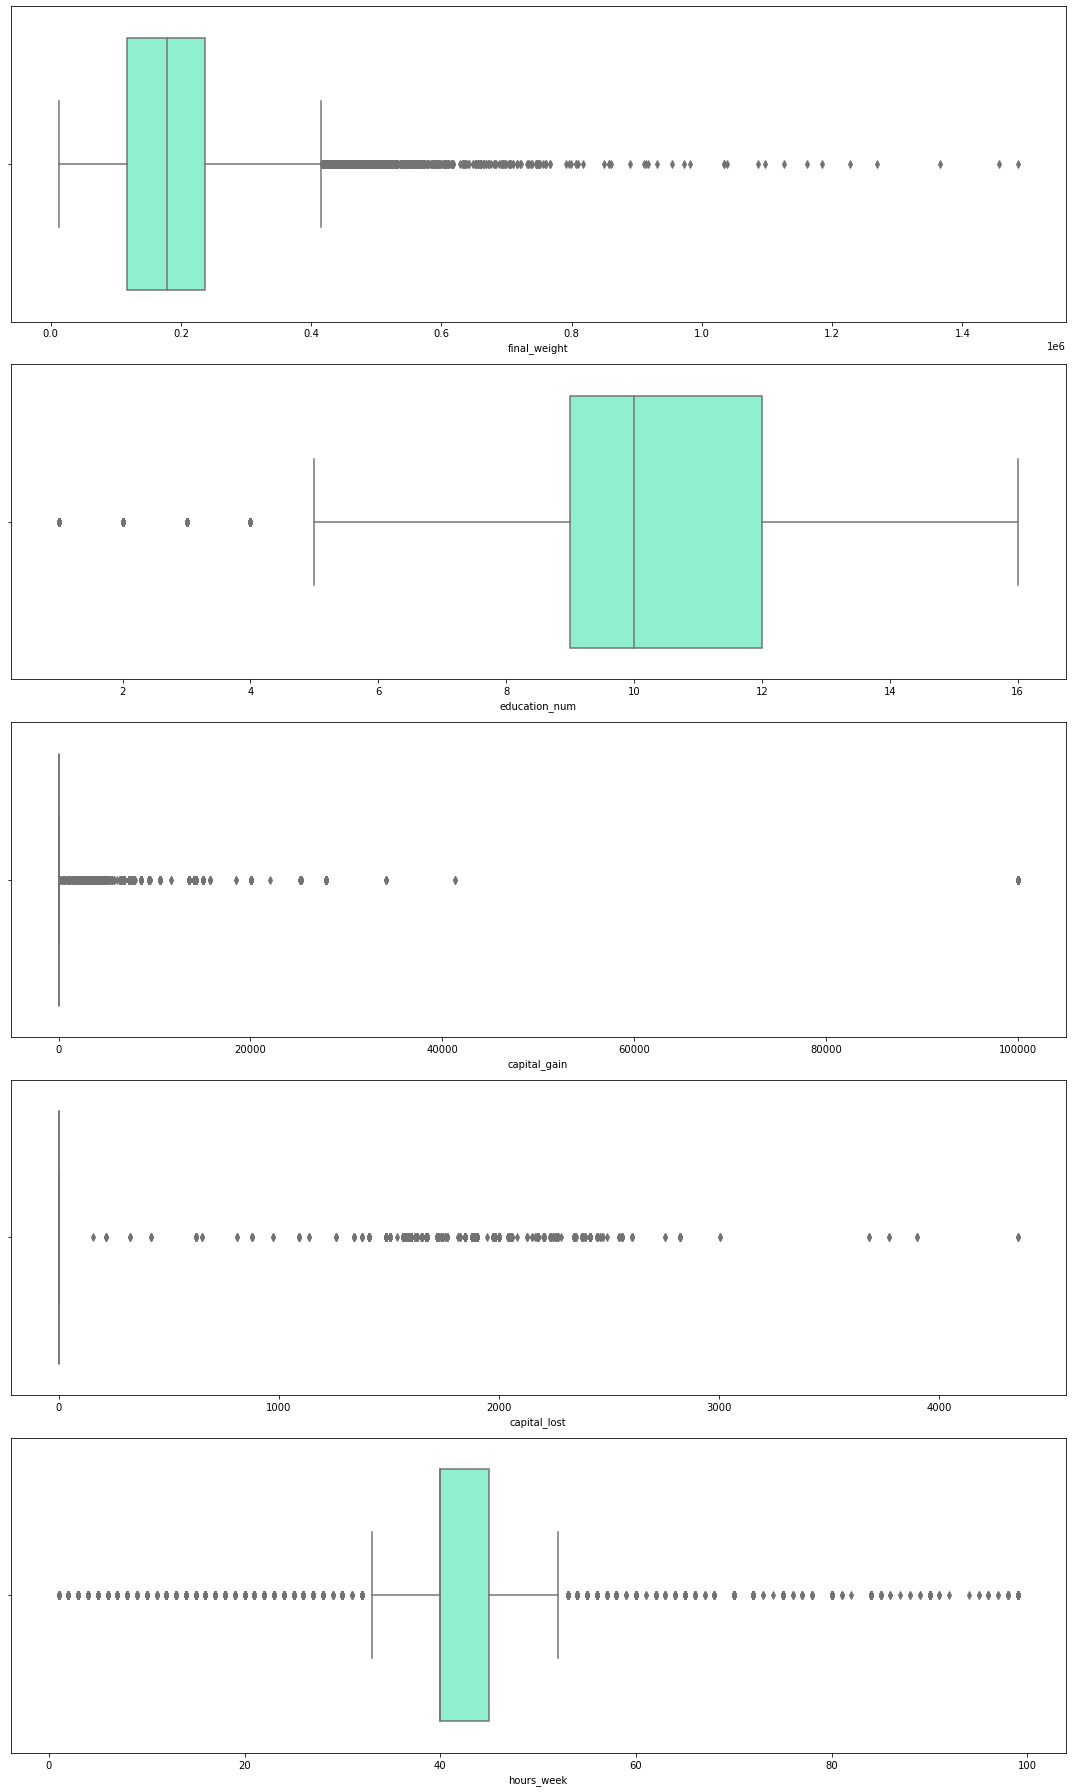

In [21]:
#Outliers visualmente 
fig, axes = plt.subplots(5, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
plt.show()

In [22]:
indices.keys()

dict_keys(['final_weight', 'education_num', 'capital_gain', 'capital_lost', 'hours_week'])

In [23]:
#outliers_capital = df[(df['capital_gain'] == 0) | (df['capital_lost'] == 0)]
#separar por final weight y divir en censos alta poblacion/ menos poblacion


---

Variable predictora: bachelor, ethincity o todas

variable respuesta : final weight 

Sustituir outliers education por mediana (son pocos) 

Tratar la columna final weight(outliers) para poder trabajar con ella 

---

revisar de aqui abajo 

---

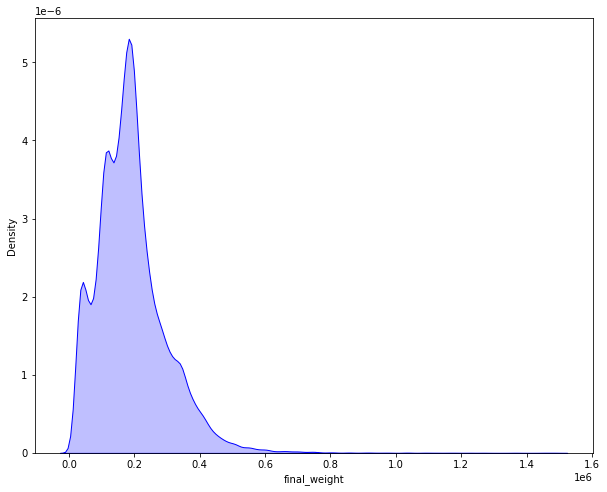

In [24]:
# Visualizacion de como esta distribuida nuestra variable respuesta
sns.distplot(
    df["final_weight"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [26]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
final_weight,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital_lost,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


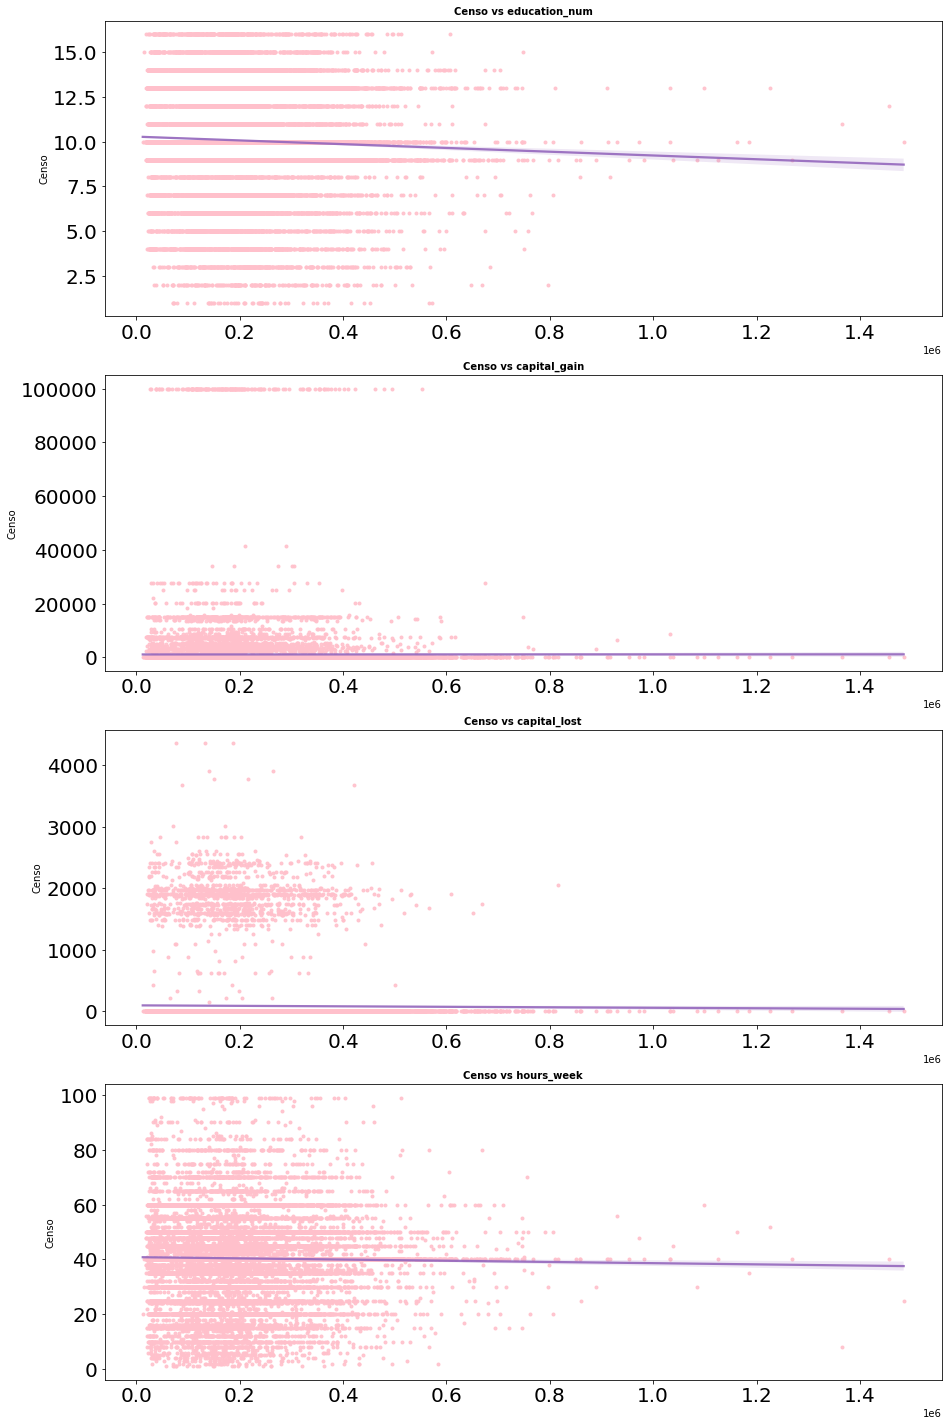

In [36]:
# Visualizacion relacion v.respuesta - v.predictora

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 25))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("final_weight")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df["final_weight"],
        y = df[colum], 
        color = "pink", 
        marker = ".", 
        scatter_kws = {"alpha": 0.9}, 
        line_kws = {"color": "C4", "alpha": 0.9 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Censo vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Censo")
    

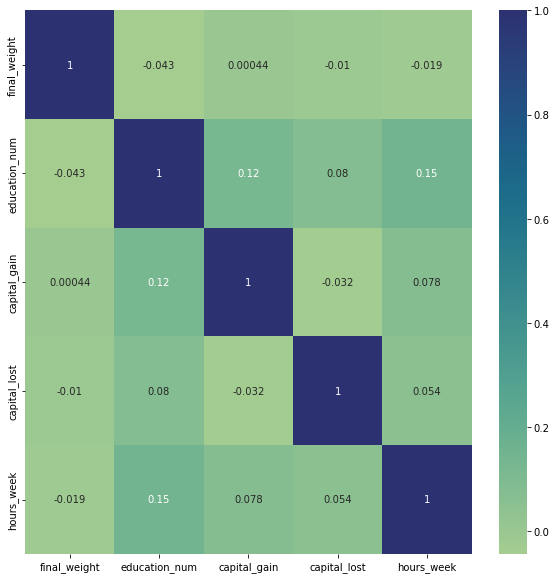

In [31]:
# Vemos con un heatmap la correlacion, el grado de correlacion de todas nuestras variables:

plt.figure(figsize = (10,10))

sns.heatmap(df.corr(), 
           cmap = "crest", 
           annot = True);